In [14]:
%matplotlib
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
# import gmplot
# from geopy.geocoders import Nominatim
# import time
# import gmaps
# import gmaps.datasets
import folium

Using matplotlib backend: Qt5Agg


In [2]:
%matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
# import gmplot
# from geopy.geocoders import Nominatim
# import time
# import gmaps
# import gmaps.datasets

Aijobsindustry_dataset = pd.read_csv("AIJobsIndustry_Clean_v3.csv")
print(f"No of rows in Aijobsindustry_dataset is {Aijobsindustry_dataset.shape[0]}")

Dice_us_jobs_dataset = pd.read_csv("Dice_US_jobs_Clean_v4.csv", encoding="cp437")
print(f"No of rows in Dice_us_jobs_dataset is {Dice_us_jobs_dataset.shape[0]}")

monster_dataset = pd.read_csv("Monster_Clean.csv")
print(f"No of rows in monster_dataset is {monster_dataset.shape[0]}")

indeed_dataset = pd.read_csv("alldata_Clean_v3.csv")
print(f"No of rows in indeed_dataset is {indeed_dataset.shape[0]}")

##file needs to match format for concat
dice_tech_filtered = pd.read_csv("Dice_US_Tech_FilteredJobData.csv")
print(f"No of rows in dice_tech_filtered is {dice_tech_filtered.shape[0]}")

print(f"No of rows in final merged data set should be {Aijobsindustry_dataset.shape[0]+Dice_us_jobs_dataset.shape[0]+monster_dataset.shape[0]+indeed_dataset.shape[0]+dice_tech_filtered.shape[0]}")

datasets_to_merge = [Aijobsindustry_dataset,Dice_us_jobs_dataset,monster_dataset,indeed_dataset,dice_tech_filtered]

##please confirm the concat makes sense
merged_dataset = pd.concat(datasets_to_merge, sort=False)
print(f"Actual no of rows in merged_dataset is {merged_dataset.shape[0]}")

Using matplotlib backend: Qt5Agg
No of rows in Aijobsindustry_dataset is 631
No of rows in Dice_us_jobs_dataset is 1265
No of rows in monster_dataset is 162
No of rows in indeed_dataset is 6953
No of rows in dice_tech_filtered is 1566
No of rows in final merged data set should be 10577
Actual no of rows in merged_dataset is 10577


In [3]:
desc = merged_dataset['Description']
#print(desc)

In [4]:
group_by_state = merged_dataset.groupby("Loc_state")
count_for_state = group_by_state.count()
count_for_state = count_for_state['Position']
#print(count_for_state)

In [5]:
state_list = os.path.join('states.csv')
state_list_df = pd.read_csv(state_list)
#print(state_list_df.head())
for item in state_list_df['Abbreviation']:
    if item not in count_for_state:
        count_for_state.at[item] = 0
#print(count_for_state)

In [6]:
import folium
import pandas as pd
map = folium.Map(location=[40, -100], zoom_start=4.3)
state_geo = os.path.join('us-states.json')

In [18]:
map.choropleth(geo_data=state_geo,
 name='choropleth',
 data=count_for_state,
 columns=['Loc_state', ''],
 threshold_scale = [0, 25, 150, 600, 1400, 2500],
 key_on='feature.id',
 fill_color='YlOrRd',
 fill_opacity=0.7,
 line_color = 'blue',
 line_opacity=0.3,
 legend_name='Job distribution across the USA',
 smooth_factor = 1,
 highlight = True)
folium.LayerControl().add_to(map)
map.save('folium_chloropleth_USA1.html')
map

In [8]:
skill_list =['data analysis','machine learning','statistics','computer science','communication','mathematics', 'visualization', 'ai',\
             'deep learning', 'nlp', 'software development','neural networks', 'project management', 'software engineering', \
              'data engineering','bi','modeling','etl','statistical analysis','research','deep learning','interpersonal skills',\
            'web scraping','neural network','decision tree','random forest','testing']
tool_list = ['python','r','sql','hadoop','spark','java','sas','tableau','hive','scala','aws','c++','matlab',\
             'c','excel','nosql','linux','vba','json','numpy','pandas','matplotlib','api','mysql','mongodb','html','css',\
             'java script','ajax','d3','leaflet','matlab']
edu_list = ['bachelor','bachelors','master','masters','phd','post graduation','graduation','high school','No degree requirement']

In [9]:
description = merged_dataset['Description']
skills = merged_dataset['Skills']
parse_list = description.append(skills)

In [10]:
skill_count = {}
tool_count = {}
edu_count = {}
for entry in parse_list:
    try:
        entry = re.sub('[./\n\r(),:-]', ' ', str(entry))
#        print(entry)
        entry = re.sub('[^A-Za-z0-9+ ]', '', str(entry)).lower()
        entry = re.sub('data analytics', 'data analysis', str(entry))
        entry = re.sub('artificial intelligence', 'ai', str(entry))
#        print(entry)
        for skill in skill_list:
            if (f' {skill} ' in f' {entry} '):
                if skill not in skill_count:
                    skill_count[skill] = 1
                else:
                    skill_count[skill] += 1
        for tool in tool_list:
            if f' {tool} ' in f' {entry} ':
                if tool not in tool_count:
                    tool_count[tool] = 1
                else:
                    tool_count[tool] += 1   
        for edu in edu_list:
            if f' {edu} ' in f' {entry} ':
                if edu not in edu_count:
                    edu_count[edu] = 1
                else:
                    edu_count[edu] += 1   
    except:
        print("Skipping an entry due to bad data")
        continue
print(skill_count)
print(tool_count)
print(edu_count)
education_count = {
    'High School':edu_count['high school'],
    'Bachelors':edu_count['bachelors']+edu_count['bachelor']+edu_count['graduation'],
    'Masters':edu_count['masters']+edu_count['master']+edu_count['post graduation'],
    'Phd':edu_count['phd'],
    'No min education requiement':len(skill_count)-len(edu_count)
}
print(education_count)

{'communication': 4795, 'testing': 2257, 'statistics': 2273, 'mathematics': 1336, 'research': 4385, 'software development': 1188, 'project management': 791, 'modeling': 2210, 'etl': 1169, 'interpersonal skills': 680, 'data analysis': 2392, 'visualization': 1059, 'statistical analysis': 693, 'bi': 896, 'machine learning': 2807, 'computer science': 3163, 'nlp': 360, 'software engineering': 568, 'ai': 890, 'data engineering': 314, 'deep learning': 1238, 'neural network': 47, 'neural networks': 298, 'web scraping': 14, 'decision tree': 27, 'random forest': 72}
{'sql': 3997, 'sas': 864, 'excel': 1385, 'html': 410, 'css': 367, 'python': 3894, 'linux': 1034, 'tableau': 792, 'c': 1273, 'java': 2034, 'api': 424, 'java script': 26, 'json': 200, 'aws': 968, 'spark': 1352, 'mongodb': 303, 'r': 2175, 'hadoop': 1627, 'hive': 847, 'c++': 1139, 'mysql': 553, 'matlab': 1268, 'vba': 154, 'nosql': 650, 'scala': 677, 'ajax': 74, 'd3': 169, 'numpy': 171, 'pandas': 202, 'matplotlib': 50, 'leaflet': 5}
{'bac

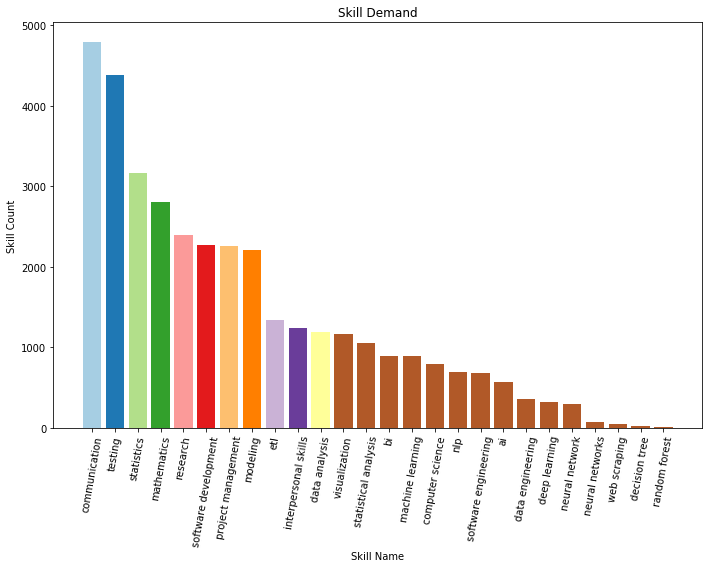

In [17]:
skill_count_df = pd.DataFrame.from_dict(skill_count, orient='index').rename(columns={0:'Skill Count'}).sort_values(by=['Skill Count'], ascending =0)
#print(skill_count_df.head())
plt.figure(figsize=(10,8))
plt.bar(range(len(skill_count_df)), skill_count_df["Skill Count"], color=plt.cm.Paired(np.arange(len(skill_count_df))))
plt.xticks(range(len(skill_count_df)),list(skill_count.keys()),rotation=80)
plt.title('Skill Demand')
plt.xlabel('Skill Name')
plt.ylabel('Skill Count')
plt.tight_layout()
plt.show()

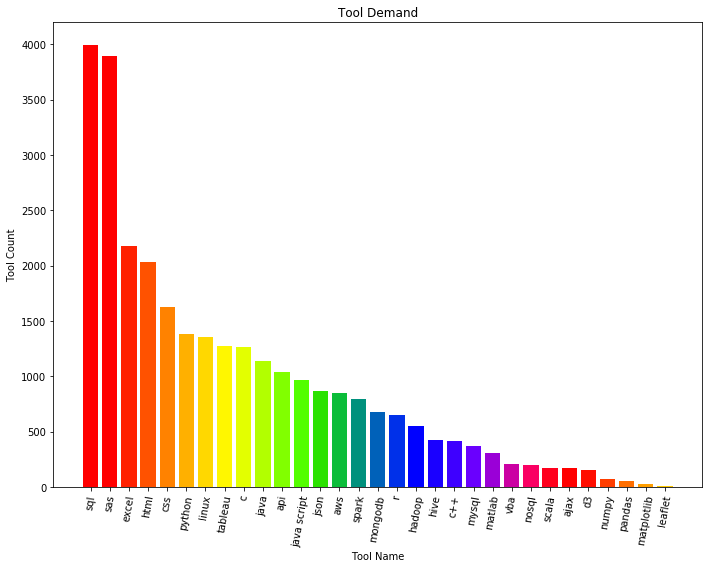

In [16]:
tool_count_df = pd.DataFrame.from_dict(tool_count, orient='index').rename(columns={0:'Tool Count'}).sort_values(by=['Tool Count'], ascending =0)
#print(skill_count_df.head())
plt.figure(figsize=(10,8))
plt.bar(range(len(tool_count_df)), tool_count_df["Tool Count"], color=plt.cm.prism(np.arange(len(tool_count_df))))
plt.xticks(range(len(tool_count_df)),list(tool_count.keys()),rotation=80)
plt.title('Tool Demand')
plt.xlabel('Tool Name')
plt.ylabel('Tool Count')
plt.tight_layout()
plt.show()

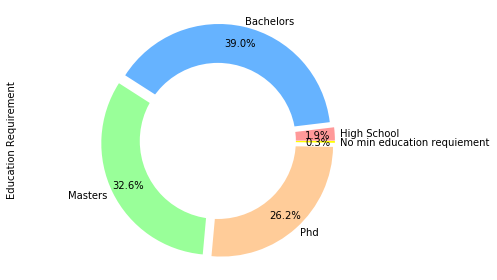

In [37]:
education_count_df = pd.DataFrame.from_dict(education_count, orient='index').rename(columns={0:'Education Requirement'})
#print(skill_count_df.head())
#print(education_count_df.head())
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', 'yellow']
explode = (0.05,0.05,0.05,0.05,0.05)
ax = education_count_df.plot(kind='pie',y =['Education Requirement'], autopct='%1.1f%%',startangle=360, shadow=False,\
                        labels=education_count_df.index, colors=colors, explode=explode, pctdistance=0.85,\
                            labeldistance=1.05)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis('equal')
ax.get_legend().remove()
#plt.legend(loc='best', bbox_to_anchor=(-0.1, 1.),fontsize=8)
plt.tight_layout()
plt.show()